<a href="https://colab.research.google.com/github/Taha0229/simple-hand-sign-detection/blob/main/hand_sign_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *

%matplotlib inline
np.random.seed(1)

#**Load the sign dataset**

In [3]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

y = 4


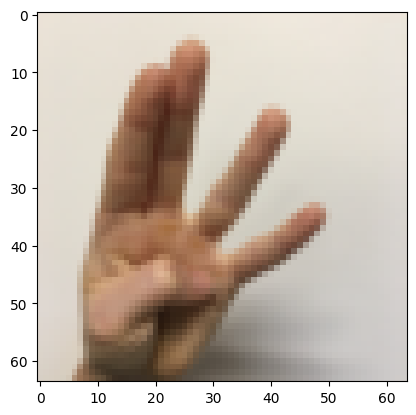

In [4]:
# Example of an image from the dataset
index = 9
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

#**Split the data into train and test sets**

In [5]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


#**Model defination**

In [6]:
# GRADED FUNCTION: convolutional_model

def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE


    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process)
    """

    input_img = tf.keras.Input(shape=input_shape)

    Z1 = tfl.Conv2D(8, (4,4), 1, 'same')(input_img)
    A1 = tfl.ReLU()(Z1)
    P1 = tfl.MaxPool2D((8,8), 8, 'same')(A1)
    Z2 = tfl.Conv2D(16, (2,2), 1, 'same')(P1)
    A2 = tfl.ReLU()(Z2)
    P2 = tfl.MaxPool2D((4,4), 4, 'same')(A2)
    F = tfl.Flatten()(P2)
    outputs = tfl.Dense(6, activation="softmax")(F)



    # YOUR CODE ENDS HERE
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

#**Compile the model**

In [7]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 8)         392       
                                                                 
 re_lu (ReLU)                (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 8)           0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_1 (ReLU)              (None, 8, 8, 16)          0         
                                                             

#**Train the model**

In [8]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 10s 28ms/step - loss: 1.8165 - accuracy: 0.1796 - val_loss: 1.7860 - val_accuracy: 0.1917
Epoch 2/100
17/17 [==============================] - 0s 10ms/step - loss: 1.7860 - accuracy: 0.1750 - val_loss: 1.7801 - val_accuracy: 0.2167
Epoch 3/100
17/17 [==============================] - 0s 10ms/step - loss: 1.7821 - accuracy: 0.2222 - val_loss: 1.7764 - val_accuracy: 0.2750
Epoch 4/100
17/17 [==============================] - 0s 10ms/step - loss: 1.7790 - accuracy: 0.2426 - val_loss: 1.7733 - val_accuracy: 0.3583
Epoch 5/100
17/17 [==============================] - 0s 11ms/step - loss: 1.7741 - accuracy: 0.2741 - val_loss: 1.7660 - val_accuracy: 0.2583
Epoch 6/100
17/17 [==============================] - 0s 9ms/step - loss: 1.7666 - accuracy: 0.2676 - val_loss: 1.7605 - val_accuracy: 0.3750
Epoch 7/100
17/17 [==============================] - 0s 10ms/step - loss: 1.7590 - accuracy: 0.3231 - val_loss: 1.7546 - val_accuracy: 0.3750
Epoch 

#**History**

In [9]:
history.history

{'loss': [1.8165148496627808,
  1.7859549522399902,
  1.7821354866027832,
  1.778997778892517,
  1.7740854024887085,
  1.766603946685791,
  1.7590479850769043,
  1.7505733966827393,
  1.7403678894042969,
  1.728707194328308,
  1.7111109495162964,
  1.6888874769210815,
  1.6629889011383057,
  1.6337392330169678,
  1.602573275566101,
  1.5673818588256836,
  1.528258204460144,
  1.4885088205337524,
  1.451012134552002,
  1.4134087562561035,
  1.3782644271850586,
  1.344779133796692,
  1.3130419254302979,
  1.2834374904632568,
  1.2546333074569702,
  1.2277370691299438,
  1.201857089996338,
  1.1766324043273926,
  1.1531258821487427,
  1.1302638053894043,
  1.1091381311416626,
  1.088670015335083,
  1.0688830614089966,
  1.0501028299331665,
  1.0328364372253418,
  1.015669584274292,
  0.9992415904998779,
  0.9845748543739319,
  0.9700368046760559,
  0.9553958177566528,
  0.9417673945426941,
  0.9292426109313965,
  0.9157955646514893,
  0.9051711559295654,
  0.8936718702316284,
  0.87984502

#**Visualize the history**

<ipython-input-10-b296b54b08f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
<ipython-input-10-b296b54b08f3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

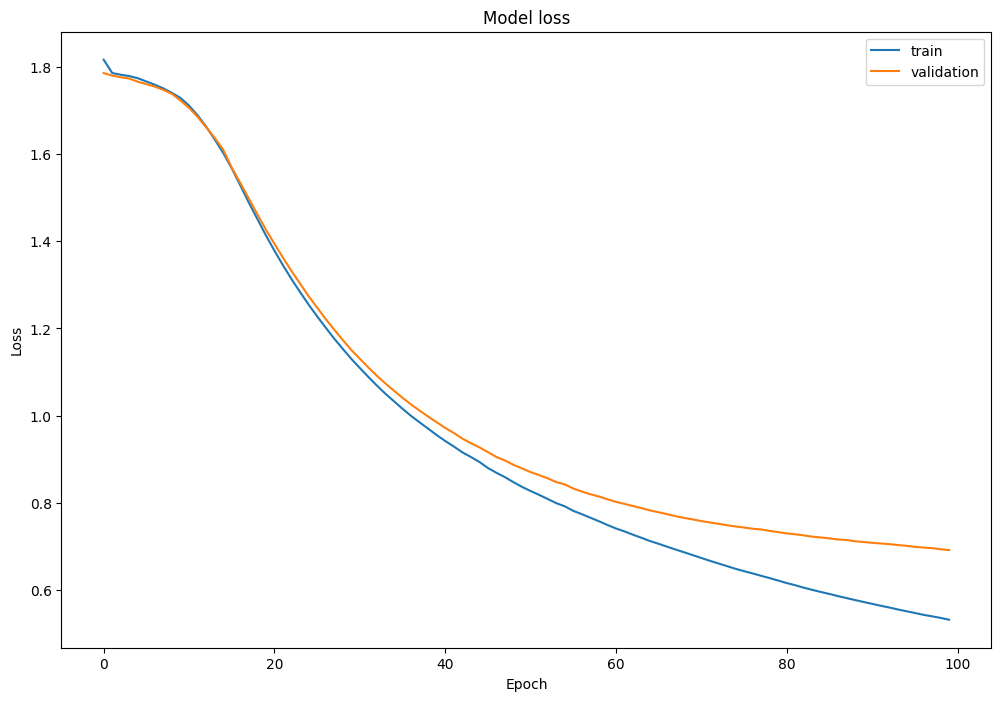

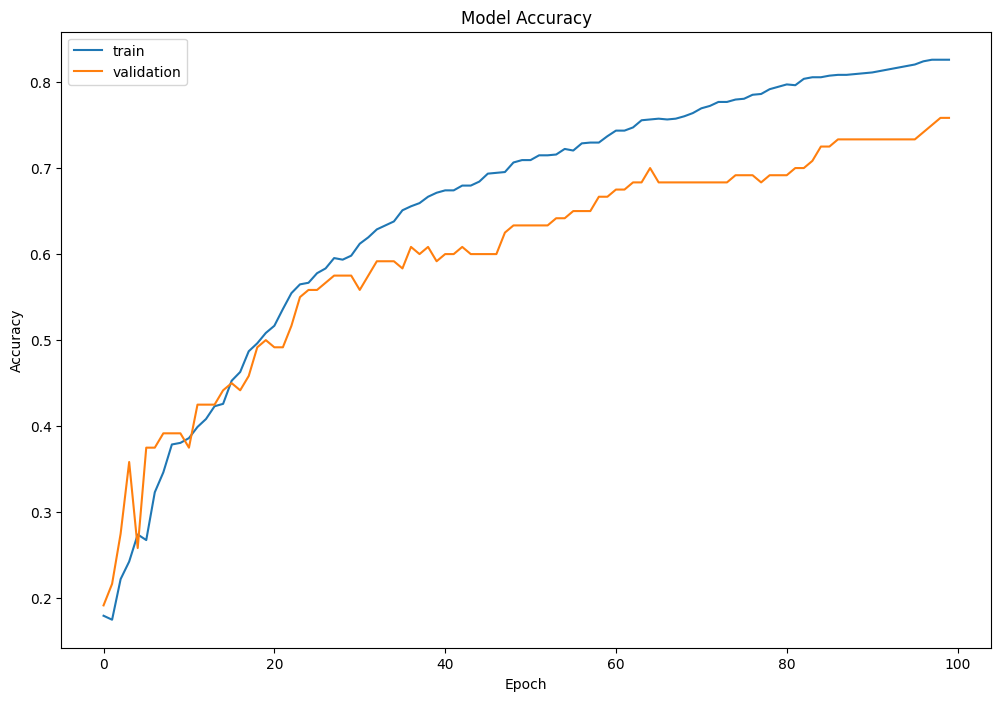

In [10]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

#**Predict**

(64, 64, 3)
1/1 [==============================] - 0s 76ms/step
3


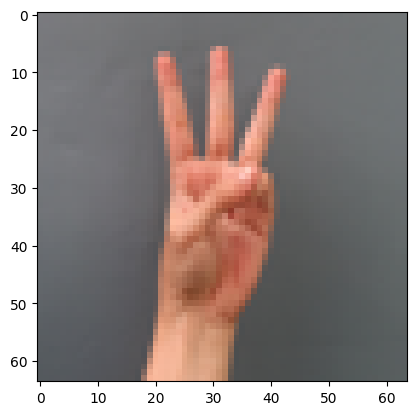

In [12]:
my_image = "3.jpg"
# We preprocess the image to fit your algorithm.
image = np.array(Image.open(my_image).resize((64, 64)))
print(image.shape)
plt.imshow(image)
image = image.reshape((1, 64, 64, 3))
image = image / 255.
predictions_single = conv_model.predict(image)
print(np.argmax(predictions_single))
